### Tutorial showing how to read EBAS NASA Ames files

**Note**: this notebook is currently under development

Please see [here](https://ebas-submit.nilu.no/Submit-Data/Getting-started) for information related to the EBAS NASA Ames file format.

**Further links**:
 - [Pyaerocom website](http://aerocom.met.no/pyaerocom/)
 - [Pyaerocom installation instructions](http://aerocom.met.no/pyaerocom/readme.html#installation)
 - [Getting started](http://aerocom.met.no/pyaerocom/notebooks.html#getting-started)

In [1]:
import pyaerocom as pya

Initating pyaerocom configuration


Checking server configuration ...


Checking access to: /lustre/storeA


Access to lustre database: True


Init data paths for lustre


Expired time: 0.018 s


In [2]:
ebasdir = pya.const.EBASMC_DATA_DIR
ebasdir

'/lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/EBASMultiColumn/data/data/'

Provide filename of one of the files in the directory

In [3]:
filename = "DE0043G.20080101000000.20160708144500.nephelometer..aerosol.1y.1h.DE09L_tsi_neph_3563.DE09L_nephelometer.lev2.nas"

In [4]:
mc = pya.io.EbasNasaAmesFile(file=ebasdir+filename,
                             only_head=False,          #set True if you only want to import header
                             replace_invalid_nan=True, #replace invalid values with NaNs
                             convert_timestamps=True,  #compute datetime64 timestamps from numerical values
                             decode_flags=True)        #decode all flags (e.g. 0.111222333 -> 111 222 333)
                             
print(mc)

Pyaerocom EbasNasaAmesFile
--------------------------

   num_head_lines: 60
   num_head_fmt: 1001
   data_originator: Flentje, Harald
   sponsor_organisation: DE09L, Deutscher Wetterdienst, DWD, Met. Obs., Hohenspeissenberg, , 82283, Hohenspeissenberg, Germany
   submitter: Flentje, Harald
   project_association: EUSAAR GAW-WDCA
   vol_num: 1
   vol_totnum: 1
   ref_date: 2008-01-01T00:00:00
   revision_date: 2016-07-08T00:00:00
   freq: 0.041667
   descr_time_unit: days from file reference point
   num_cols_dependent: 11
   mul_factors (list, 11 items)
   [1.0
    1.0
    ...
    1.0
    1.0]

   vals_invalid (list, 11 items)
   [999.999999
    999.999
    ...
    9999.9
    9.999999999]

   descr_first_col: end_time of measurement, days from the file reference point

   Column variable definitions
   -------------------------------
   EbasColDef: name=starttime, unit=days, is_var=False, is_flag=False, flag_col=11, 
   EbasColDef: name=endtime, unit=days, is_var=False, is_flag=False,

The NASA Ames files are strucured in the same way as they are represented by in the instance of the EbasNasaAmesFile class. 

- A header with global metadata
- One row that specifies multiplication factors for each data column (``mul_factors``)
- One row that specifies NaN-equivalent values for each data column (``vals_invalid``)
- A number of rows specifying metainformation for each data column in the file (i.e. 12 rows, if the data has 12 columns)
- Dataset specific metadata 
- Data block: rows are timestamps, columns are different columns specified in the header (cf. 2 points above)

    - Represented by 2D numpy array (``data`` attribute) where first index is row and second index is column
    

For details related to the file format [see here](https://ebas-submit.nilu.no/Submit-Data/Data-Reporting/Templates/Category/Aerosol/Aerosol-Optical-Depth).

In [5]:
print(mc.shape)

(8784, 12)


#### Column information

Detailed information about each column can be accessed via the ``var_defs`` attribute. E.g. to see what is in the 4th column:

In [6]:
mc.var_defs[3]

EbasColDef: name=aerosol_light_backscattering_coefficient, unit=1/Mm, is_var=True, is_flag=False, flag_col=11, wavelength=550.0 nm, 

The ``is_var`` attribute specifies, whether this column contains actual variable data or if it is a flag column. A NASA Ames file can have one or more flag columns that can be used to identify valid or invalid measurments. Each flag in a flag column comprises a floating point number that has encoded up to 3 3-digit numerical flags which are specified here:

https://github.com/metno/pyaerocom/blob/master/pyaerocom/data/ebas_flags.csv

More info about the flags follows below. You can see, that the column 4 printed above has assigned column 12 (index 11) as flag column.

If you want to see an overview of all available columns in the file you may use the following command:

In [7]:
mc.print_col_info()

Column 0
Pyaerocom EbasColDef
--------------------
name: starttime
unit: days
is_var: False
is_flag: False
flag_col: 11

Column 1
Pyaerocom EbasColDef
--------------------
name: endtime
unit: days
is_var: False
is_flag: False
flag_col: 11

Column 2
Pyaerocom EbasColDef
--------------------
name: aerosol_light_backscattering_coefficient
unit: 1/Mm
is_var: True
is_flag: False
flag_col: 11
wavelength: 450.0 nm

Column 3
Pyaerocom EbasColDef
--------------------
name: aerosol_light_backscattering_coefficient
unit: 1/Mm
is_var: True
is_flag: False
flag_col: 11
wavelength: 550.0 nm

Column 4
Pyaerocom EbasColDef
--------------------
name: aerosol_light_backscattering_coefficient
unit: 1/Mm
is_var: True
is_flag: False
flag_col: 11
wavelength: 700.0 nm

Column 5
Pyaerocom EbasColDef
--------------------
name: aerosol_light_scattering_coefficient
unit: 1/Mm
is_var: True
is_flag: False
flag_col: 11
wavelength: 450.0 nm

Column 6
Pyaerocom EbasColDef
--------------------
name: aerosol_light_scatt

You can see that all variable columns were assigned the same flag column, since there is only one (column no. 11). This would be different if there were multiple flag columns (e.g. one for each variable).

#### Access flag information

You can access the flags for each column using the ``flag_col_info`` attribute of the file (and the key of the respective flag column, that you want to access, here->11).

In [8]:
flagcol = mc.flag_col_info[11]
flagcol

The raw flags can be accessed via:

In [9]:
flagcol.raw_data

array([0.394999, 0.394999, 0.394999, ..., 0.247   , 0.247   , 0.      ])

And the processed flags are in stored in a (Nx3) numpy array where N is the total number of timestamps.

In [10]:
flagcol.decoded

array([[394, 999,   0],
       [394, 999,   0],
       [394, 999,   0],
       ...,
       [247,   0,   0],
       [247,   0,   0],
       [  0,   0,   0]])

For instance, access the flags of the 5 timestamp:

In [11]:
flagcol.decoded[4]

array([394, 999,   0])

This timestamp contains 2 (of the possible up to 3) flags: 394, 999.

Validity of a combination of the flags can be directly accessed via:

In [12]:
flagcol.valid[4]

False

This combination of flags (394, 999) evaluates to an invalid measurement. Looking into [the flag definition file](https://github.com/metno/pyaerocom/blob/master/pyaerocom/data/ebas_flags.csv) we see that these two flags have the following meaning:

- 394,'Data completeness less than 90%','V'
- 999,'Missing measurement, unspecified reason','M'

where the last string specifies if this flag is valid (V) or invalid (I) or missing (M).

#### Convert object to pandas Dataframe

In [13]:
df = mc.to_dataframe()
df.head()

,starttime_days,endtime_days,aerosol_light_backscattering_coefficient_1/Mm_450.0nm,aerosol_light_backscattering_coefficient_1/Mm_550.0nm,aerosol_light_backscattering_coefficient_1/Mm_700.0nm,aerosol_light_scattering_coefficient_1/Mm_450.0nm,aerosol_light_scattering_coefficient_1/Mm_550.0nm,aerosol_light_scattering_coefficient_1/Mm_700.0nm,pressure_hPa,relative_humidity_%,temperature_K,numflag_no unit
2008-01-01 00:30:00,0.000000,0.041667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.394999
2008-01-01 01:29:59,0.041667,0.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.394999
2008-01-01 02:29:59,0.083333,0.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.394999
2008-01-01 03:30:00,0.125000,0.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.394999
2008-01-01 04:29:59,0.166667,0.208333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.394999


##### You may also apply selection constraints when converting to a DataFrame

In [14]:
scattering = mc.to_dataframe('aerosol_light_scattering_coefficient', statistics='arithmetic mean')
scattering

,aerosol_light_scattering_coefficient_1/Mm_450.0nm,aerosol_light_scattering_coefficient_1/Mm_550.0nm,aerosol_light_scattering_coefficient_1/Mm_700.0nm
2008-01-01 00:30:00,NaN,NaN,NaN
2008-01-01 01:29:59,NaN,NaN,NaN
2008-01-01 02:29:59,NaN,NaN,NaN
2008-01-01 03:30:00,NaN,NaN,NaN
2008-01-01 04:29:59,NaN,NaN,NaN
2008-01-01 05:29:59,NaN,NaN,NaN
2008-01-01 06:30:00,NaN,NaN,NaN
2008-01-01 07:29:59,NaN,NaN,NaN
2008-01-01 08:29:59,NaN,NaN,NaN
2008-01-01 09:30:00,NaN,NaN,NaN


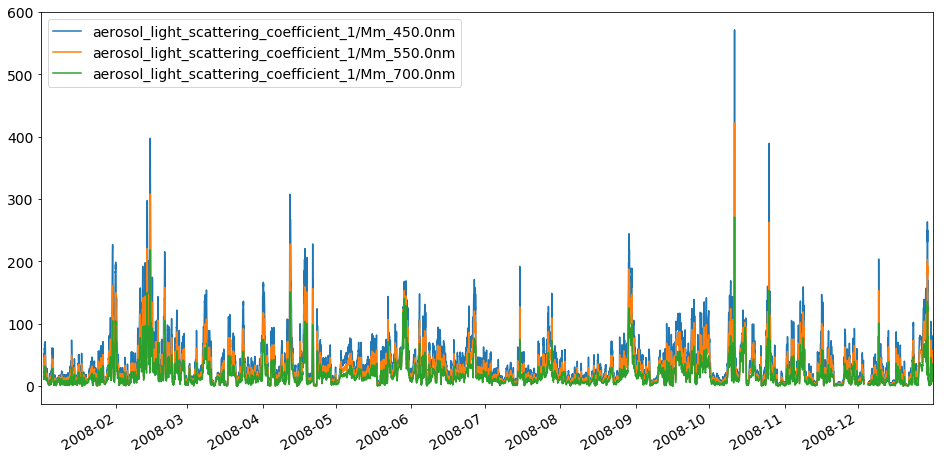

In [15]:
scattering.plot(figsize=(16,8))